In [2]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics  # for evaluation metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures  # For Polynomial Regression to change the patter of the Linear Regression (the degree is what makes the difference between Linear and Polynomial)
from sklearn.linear_model import Ridge

Flight Take off data contains continuous data

In [3]:
## Loading the dataset
df = pd.read_csv('M1_final.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
## Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [5]:
## Satistical Summary of the int and float metrics
pd.options.display.float_format = '{:.2f}'.format   # This is to format it and display it with 2 decimal points (in this case)
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00
mean,7.89,16.02,4.01,6.37,225.29,1267.75,831.00,828.93,910.87,41.49,57.73,12.37,5.54,30.09,31.09,28.43,20.86
std,4.99,8.75,1.99,38.74,119.48,889.34,299.40,305.86,345.41,8.04,23.47,6.26,11.89,0.30,9.51,8.26,6.85
min,1.00,1.00,1.00,-22.00,57.00,94.00,301.00,1.00,1.00,17.00,0.00,0.00,0.00,29.20,0.00,0.00,5.00
25%,1.00,8.00,2.00,-6.00,124.00,483.00,545.00,542.00,667.00,36.00,46.00,8.00,0.00,29.88,26.00,21.00,16.00
50%,11.00,16.00,4.00,-3.00,188.00,1029.00,856.00,854.00,918.00,42.00,59.00,12.00,0.00,30.11,30.00,30.00,19.00
75%,12.00,24.00,6.00,2.00,365.00,2248.00,1095.00,1097.00,1193.00,47.00,74.00,16.00,0.00,30.32,37.00,35.00,25.00
max,12.00,31.00,7.00,1276.00,697.00,4983.00,1439.00,1440.00,1439.00,68.00,97.00,36.00,49.00,30.75,55.00,46.00,41.00


In [6]:
# Checking the Nulls (blanks) the dataset has 
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

No nulls shown above (just a couple of instances in Wind, which has object data type) so it can be ignored

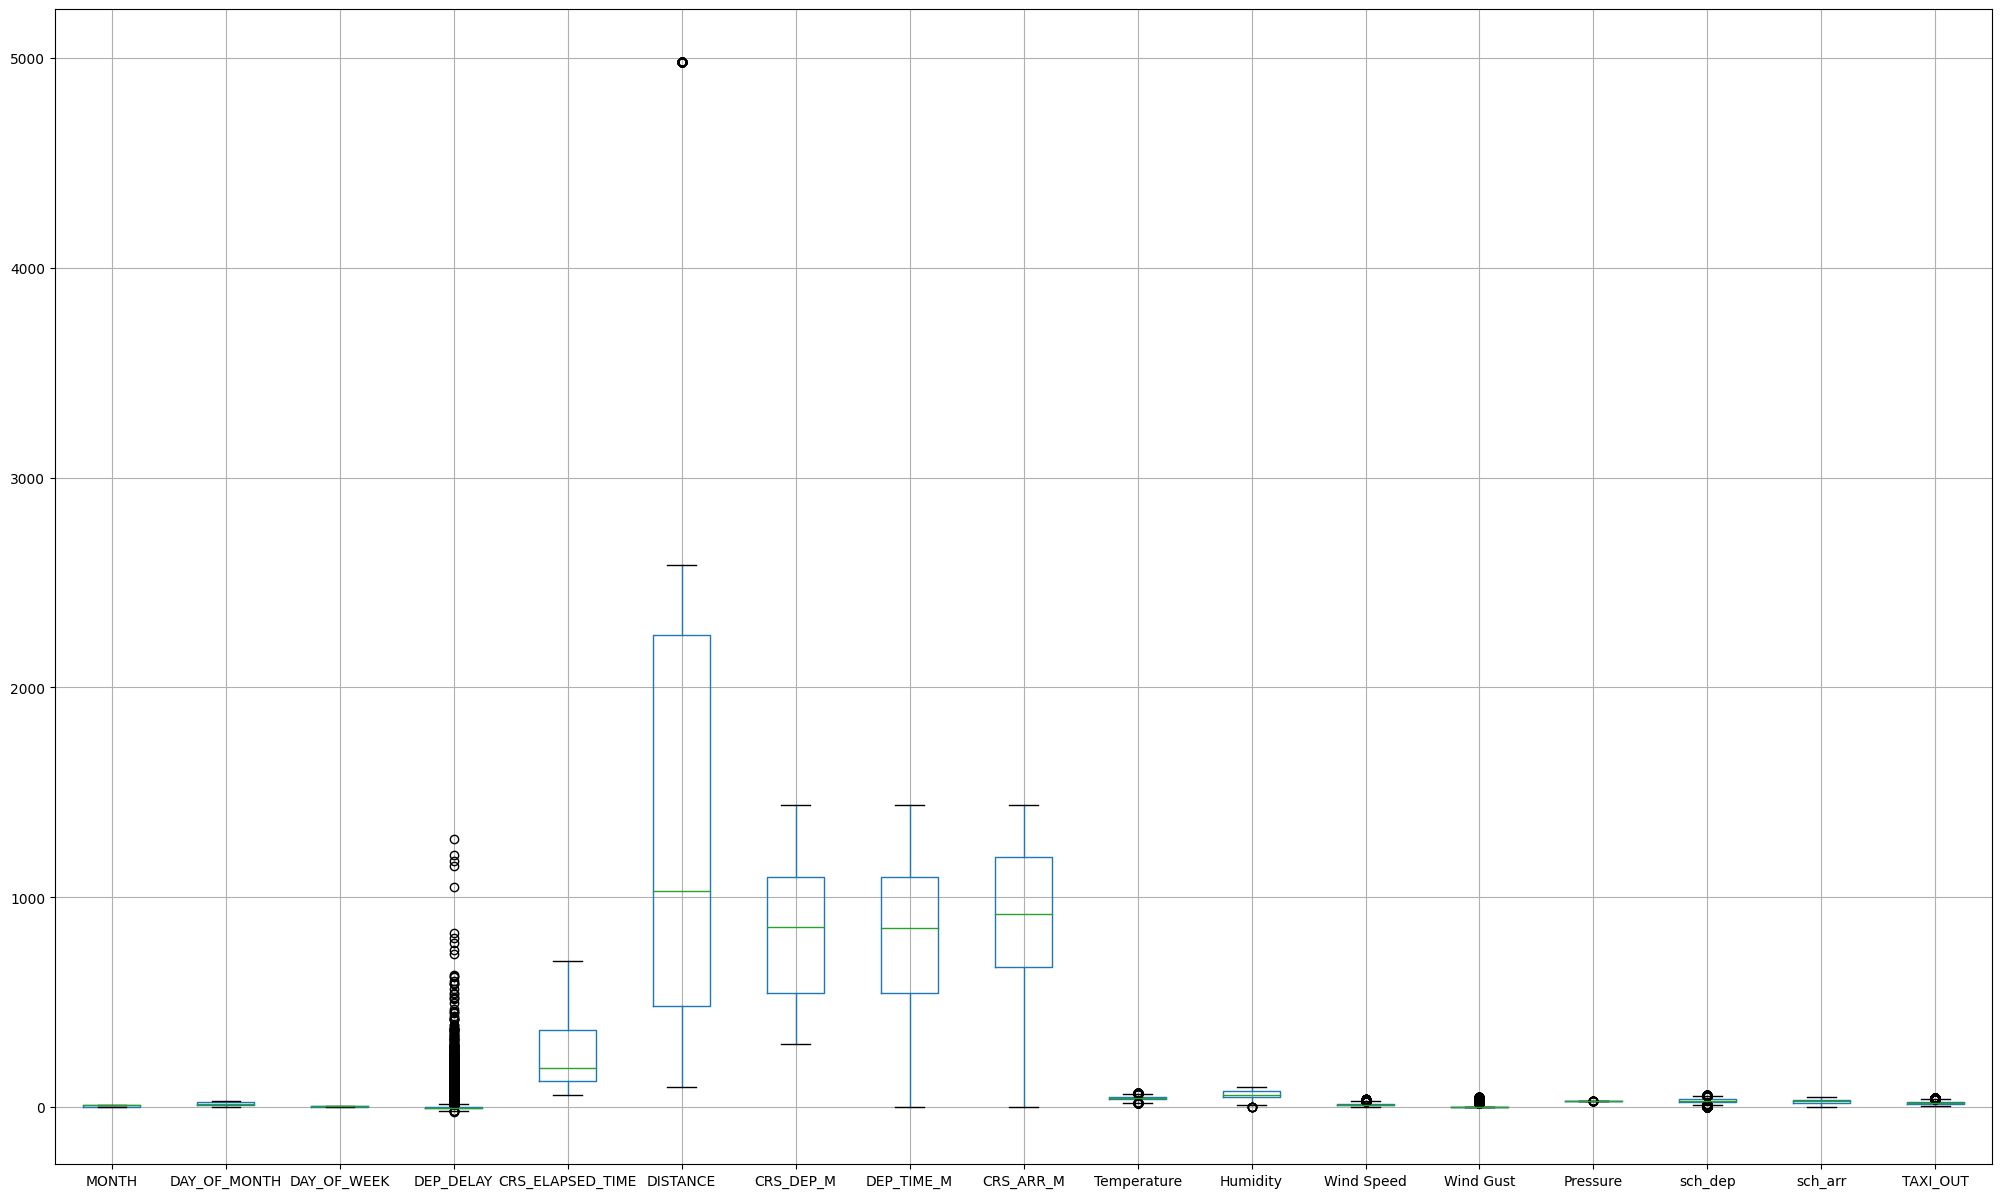

In [7]:
## Exploratory Data Analysis
## Checking out the outliers
df.boxplot(figsize=(25,15))
plt.show()

In [8]:
## Removing outliers from latitude, longitude, depth, mag, nst, gap, dmin, rms, horizontalError, depthError, magError, magNst

## remove outliers in DEP_DELAY column
max_threshold, min_threshold = df['DEP_DELAY'].quantile([0.75, 0.25])
df = df[(df.DEP_DELAY > min_threshold) & (df.DEP_DELAY < max_threshold)]

## remove outliers in DISTANCE column
max_threshold, min_threshold = df['DISTANCE'].quantile([0.75, 0.25])
df = df[(df.DISTANCE > min_threshold) & (df.DISTANCE < max_threshold)]

## remove outliers in CRS_ELAPSED_TIME column
#max_threshold, min_threshold = df['CRS_ELAPSED_TIME'].quantile([0.75, 0.25])
#df = df[(df.CRS_ELAPSED_TIME > min_threshold) & (df.CRS_ELAPSED_TIME < max_threshold)]


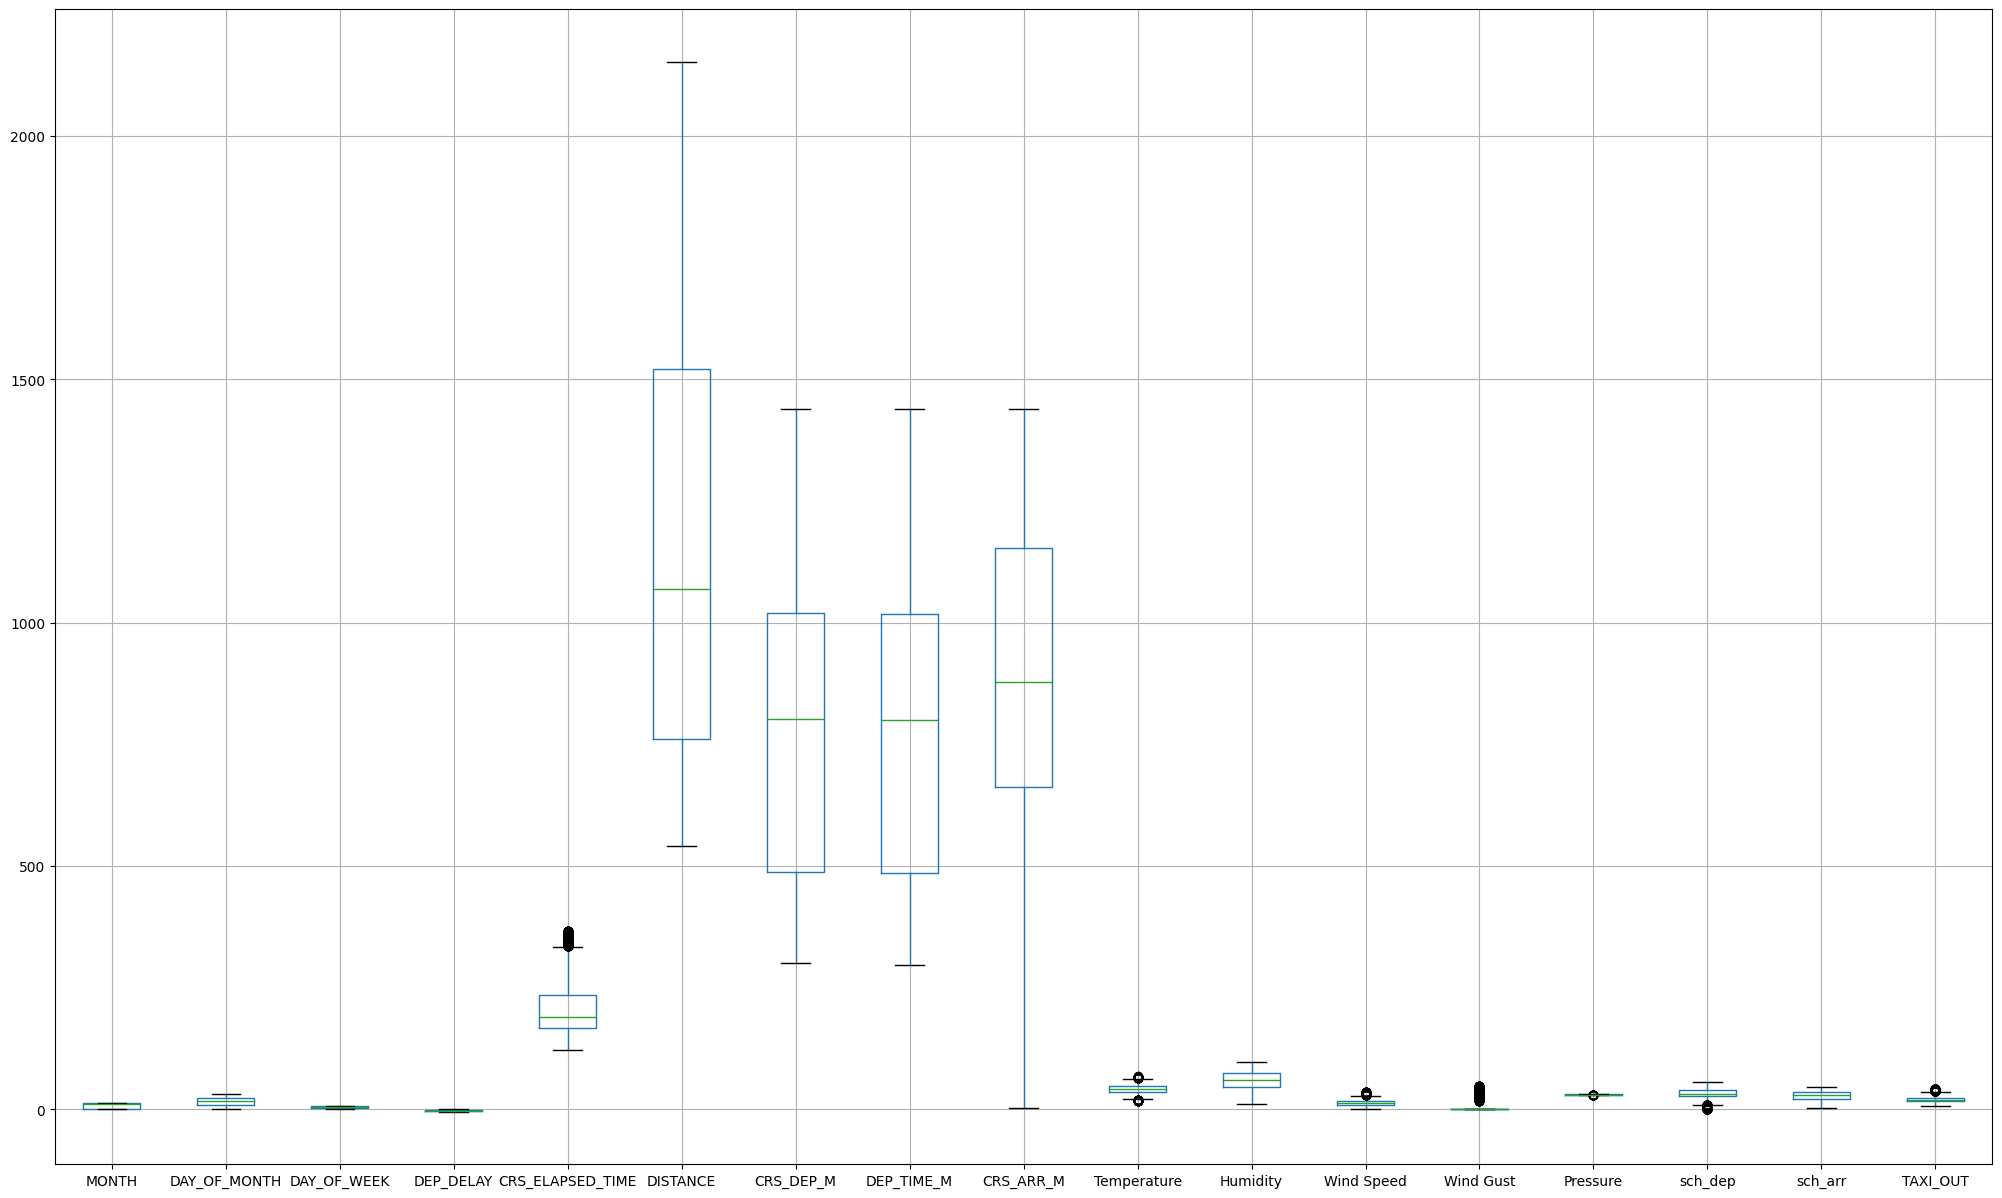

In [9]:
## Checking out the outliers
df.boxplot(figsize=(25,15))
plt.show()

In [10]:
## Correlation Matrix
corr_mat = df.corr(numeric_only=True)
corr_mat


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.00,0.04,0.03,0.04,-0.04,-0.01,-0.02,-0.01,-0.02,0.13,-0.00,-0.06,-0.08,-0.06,-0.03,-0.05,-0.04
DAY_OF_MONTH,0.04,1.00,-0.03,-0.01,0.03,0.02,0.02,0.02,0.02,-0.13,0.11,-0.10,-0.10,0.02,-0.00,0.03,-0.01
DAY_OF_WEEK,0.03,-0.03,1.00,0.03,-0.02,-0.01,-0.00,0.00,-0.02,0.02,0.00,0.10,0.13,0.11,0.01,-0.00,0.05
DEP_DELAY,0.04,-0.01,0.03,1.00,0.09,0.09,0.05,0.06,0.03,-0.03,-0.01,0.01,0.01,0.01,0.02,0.03,0.07
CRS_ELAPSED_TIME,-0.04,0.03,-0.02,0.09,1.00,0.97,0.06,0.06,0.04,-0.04,0.04,-0.02,-0.02,0.01,0.03,-0.02,0.06
DISTANCE,-0.01,0.02,-0.01,0.09,0.97,1.00,0.04,0.04,-0.01,-0.02,0.03,-0.01,-0.02,-0.00,-0.01,-0.07,0.04
CRS_DEP_M,-0.02,0.02,-0.00,0.05,0.06,0.04,1.00,1.00,0.55,0.16,-0.00,0.01,-0.02,-0.00,0.07,0.56,0.02
DEP_TIME_M,-0.01,0.02,0.00,0.06,0.06,0.04,1.00,1.00,0.55,0.16,-0.00,0.01,-0.02,-0.00,0.07,0.56,0.02
CRS_ARR_M,-0.02,0.02,-0.02,0.03,0.04,-0.01,0.55,0.55,1.00,0.15,-0.05,0.02,0.01,-0.00,0.16,0.47,0.04
Temperature,0.13,-0.13,0.02,-0.03,-0.04,-0.02,0.16,0.16,0.15,1.00,0.06,0.02,-0.04,-0.39,-0.02,0.11,-0.05


In [11]:
## Heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat, annot=True)

<AxesSubplot: >

In [12]:
## According the the above Heatmap, we can draw the following conclusions:
# - CRS_Elapsed_time (Scheduled journey time of the flight) and Distance have almost the strongest correlation possible (0.97)
# - CRS_Dep_M (Scheduled Departure Time) has perfect (1) correlation with Dep_Time_M (Actual Departure Time). Also CRS_Dep_M has moderate correlation (0.55) with CRS_ARR_M
# - Dep_Time_M moderate correlation with CRS_ARR_M (0.55)
# - CRS_Dep_M moderate with sch_arr (0.56)
# - Dep_Time_M moderate with sch_arr (0.56)
# - Wind Speed and Wind Gust features are about moderate to strong correlated (0.71)

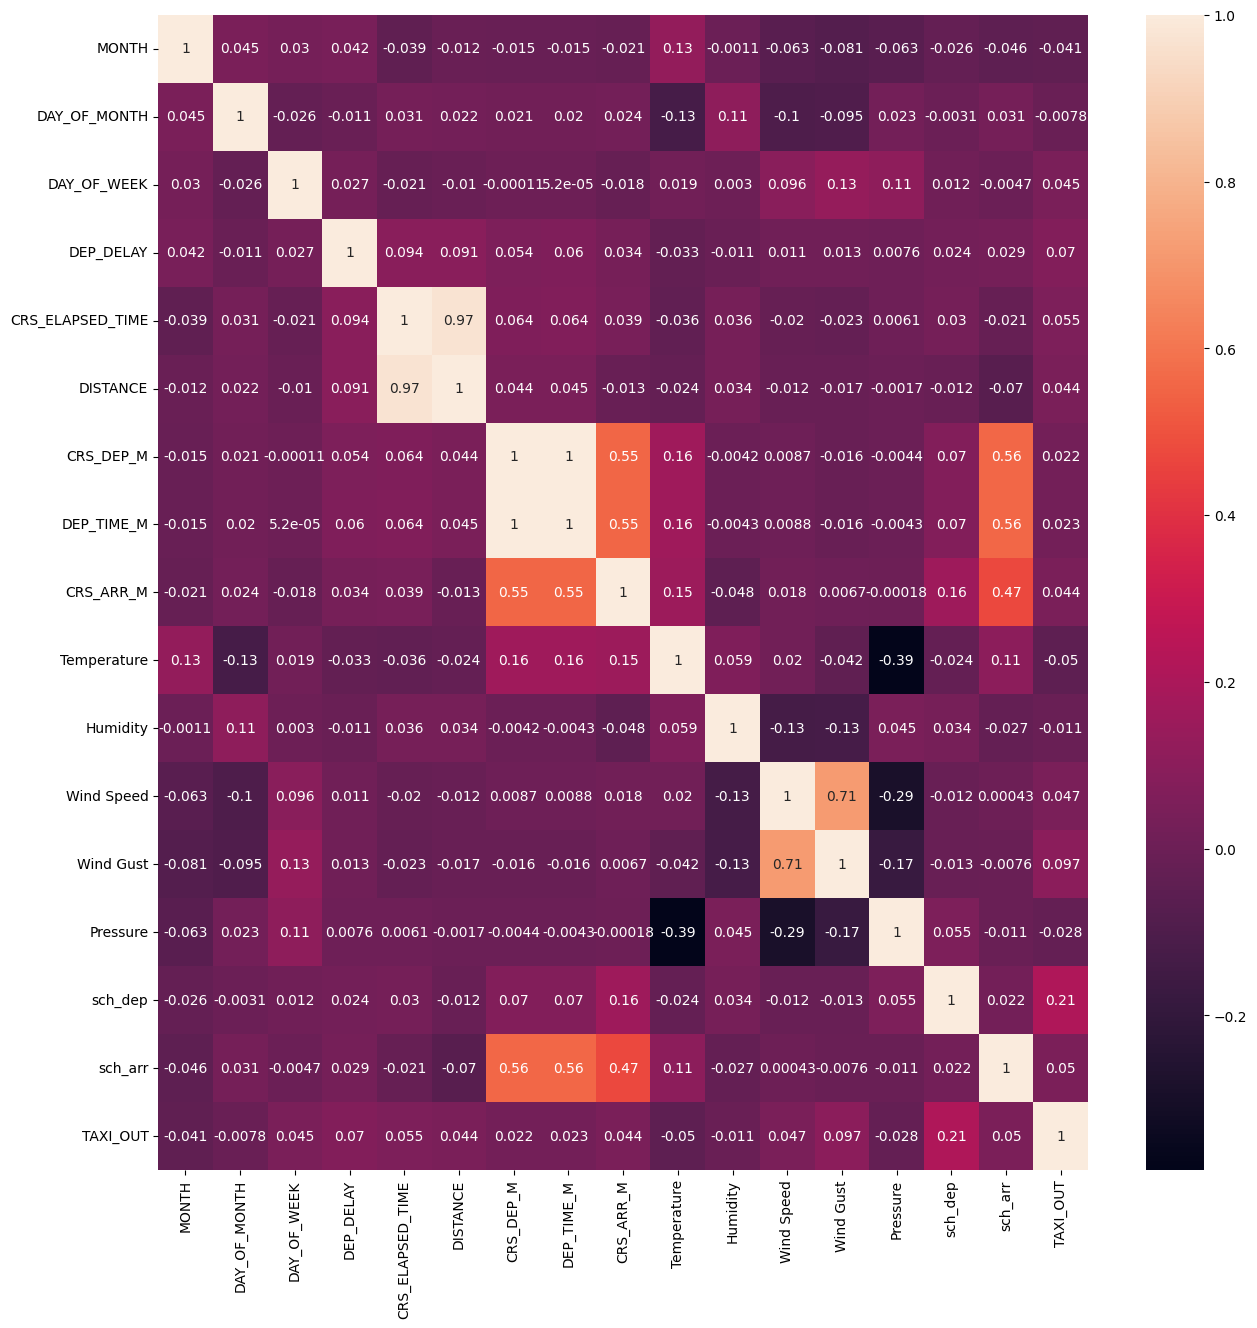

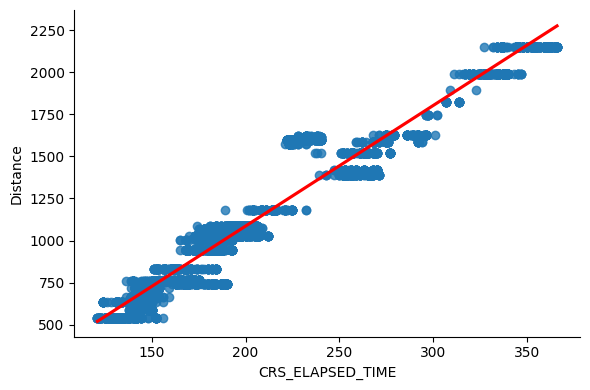

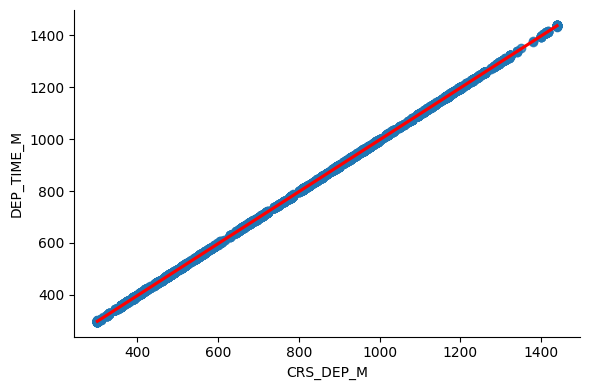

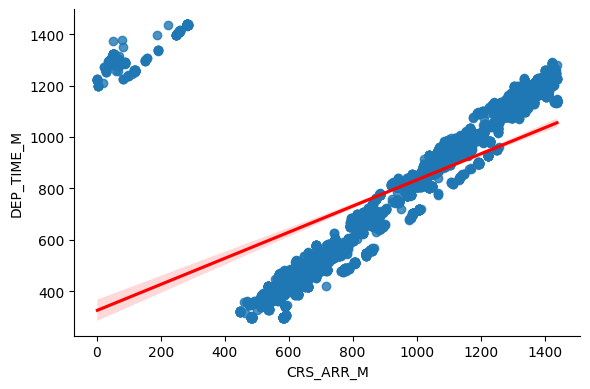

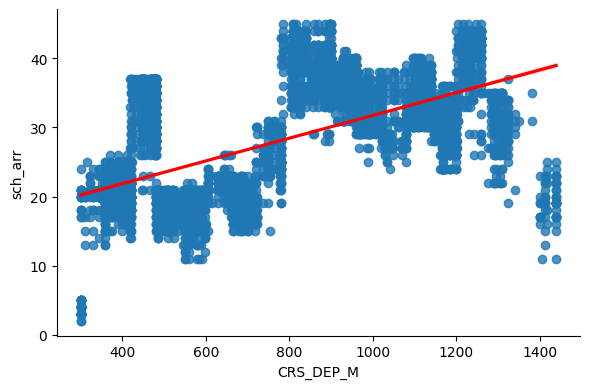

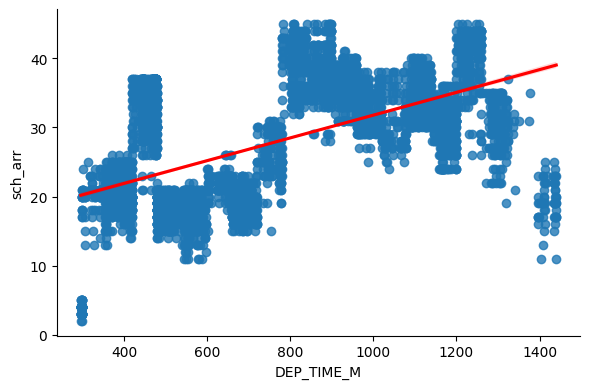

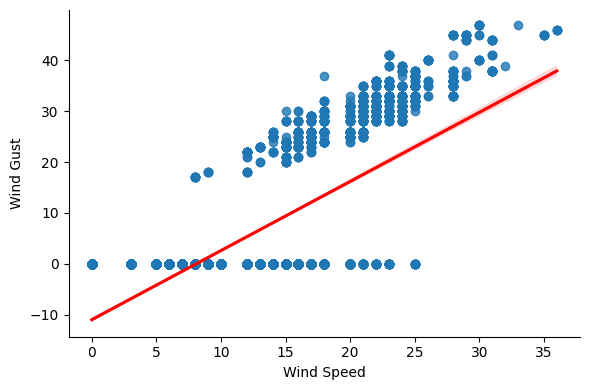

In [13]:
## Let us see what sort of relationship the above correlated metrics have with one another

## 1) CRS_Elapsed_time - Distance
sns.lmplot(x='CRS_ELAPSED_TIME', y='DISTANCE', data= df, line_kws= {'color':'red'},height=4, aspect=1.5)

## label the axes
plt.xlabel("CRS_ELAPSED_TIME")
plt.ylabel("Distance")

plt.show()

## 2) CRS_Elapsed_time - Distance
sns.lmplot(x='CRS_DEP_M', y='DEP_TIME_M', data= df, line_kws= {'color':'red'},height=4, aspect=1.5)

## label the axes
plt.xlabel("CRS_DEP_M")
plt.ylabel("DEP_TIME_M")

plt.show()

## 3) Wind Speed - Wind Gust
sns.lmplot(x='CRS_ARR_M', y='DEP_TIME_M', data= df, line_kws= {'color':'red'},height=4, aspect=1.5)

## label the axes
plt.xlabel("CRS_ARR_M")
plt.ylabel("DEP_TIME_M")

plt.show()

## 4) Wind Speed - Wind Gust
sns.lmplot(x='CRS_DEP_M', y='sch_arr', data= df, line_kws= {'color':'red'},height=4, aspect=1.5)

## label the axes
plt.xlabel("CRS_DEP_M")
plt.ylabel("sch_arr")

plt.show()

## 5) Wind Speed - Wind Gust
sns.lmplot(x='DEP_TIME_M', y='sch_arr', data= df, line_kws= {'color':'red'},height=4, aspect=1.5)

## label the axes
plt.xlabel("DEP_TIME_M")
plt.ylabel("sch_arr")

plt.show()

## 6) Wind Speed - Wind Gust
sns.lmplot(x='Wind Speed', y='Wind Gust', data= df, line_kws= {'color':'red'},height=4, aspect=1.5)

## label the axes
plt.xlabel("Wind Speed")
plt.ylabel("Wind Gust")

plt.show()

In [14]:
## Variables intercorrelated with each other
X = df.iloc[:, [7,8,9,10,11,16,17,21]]          # CRS_Elapsed_time, Distance, CRS_Dep_M, Dep_Time_M, CRS_ARR_M, sch_arr, Wind Speed, Wind Gust
y = df.iloc[:, 22]

In [15]:
## Train, test, split - training with 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) # Shuffle is by default True, so could be omitted unless I wanted to put False


In [16]:
X_train

,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Wind Speed,Wind Gust,sch_arr
5114,183,944,957,954,1140,8,0,40
24948,325,1990,665,663,870,16,24,17
19496,350,2153,1117,1117,1347,12,0,38
17119,292,1626,480,479,652,8,0,36
9921,250,1417,895,896,1085,16,0,43
...,...,...,...,...,...,...,...,...
18385,186,1028,1251,1249,1437,7,0,43
13788,198,1089,490,489,688,21,26,16
6139,164,740,983,978,1087,10,0,35
7245,196,1029,1169,1169,1305,16,26,31


In [17]:
## As data look like quite different between features, I am going to standarise the X
## Standard Scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Also, X_train is going to be trained (as well as standarised - Normalised)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-0.41029911, -0.44376356,  0.56757849, ..., -0.6755163 ,
        -0.46979812,  1.37610565],
       [ 1.93121554,  1.88731666, -0.42589577, ...,  0.59434154,
         1.53703374, -1.30949225],
       [ 2.34345403,  2.25057294,  1.11194794, ..., -0.04058738,
        -0.46979812,  1.1425754 ],
       ...,
       [-0.72360037, -0.89839106,  0.65603852, ..., -0.35805184,
        -0.46979812,  0.79228002],
       [-0.19593509, -0.25433544,  1.28886802, ...,  0.59434154,
         1.70426972,  0.32521951],
       [-1.1523284 , -1.34187573,  0.57778541, ..., -0.99298076,
        -0.46979812,  0.90904515]])

In [19]:
#### Linear Regression #####
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
pred_lin = lin_reg.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
22915,17,20.74
27239,19,21.88
22208,20,20.55
18513,40,19.27
13834,31,21.20
...,...,...
749,21,20.56
25011,18,20.80
27133,22,18.94
7054,20,19.93


In [21]:
# Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 5.444690809993936
MSE: 47.20061054733879
RMSE: 6.870270049083864
R2: 0.02244921527867727


Super low R2 (see right above)

In [22]:
## 2nd Attempt
# This time, I want to try the following:
# Creating our X and Y variables (trying with all numerical variables)
X = df.iloc[:, [0,1,2,6,7,8,9,10,11,12,14,16,17,18,20,21]]   
y = df.iloc[:, 22]

In [23]:
## Train, test, split - training with 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32, shuffle=True) # Shuffle is by default True, so could be omitted unless I wanted to put False


In [24]:
X_train

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr
5114,11,16,6,-3,183,944,957,954,1140,36,27,8,0,30.44,30,40
24948,1,20,1,-2,325,1990,665,663,870,29,38,16,24,30.27,29,17
19496,1,2,4,0,350,2153,1117,1117,1347,44,89,12,0,29.89,37,38
17119,12,26,4,-1,292,1626,480,479,652,36,10,8,0,30.32,37,36
9921,12,1,7,1,250,1417,895,896,1085,36,10,16,0,29.70,27,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18385,12,29,7,-2,186,1028,1251,1249,1437,40,10,7,0,30.07,34,43
13788,12,15,7,-1,198,1089,490,489,688,45,65,21,26,29.74,51,16
6139,11,19,2,-5,164,740,983,978,1087,46,71,10,0,29.81,32,35
7245,11,22,5,0,196,1029,1169,1169,1305,43,49,16,26,29.91,45,31


In [25]:
## As data look like quite different between features, I am going to standarise the X
## Standard Scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Also, X_train is going to be trained (as well as standarised - Normalised)
X_test = scaler.transform(X_test)

In [26]:
#### Linear Regression #####
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
pred_lin = lin_reg.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
22915,17,20.58
27239,19,20.11
22208,20,21.69
18513,40,20.39
13834,31,21.30
...,...,...
749,21,19.88
25011,18,19.74
27133,22,17.71
7054,20,20.81


In [28]:
# Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 5.2863094183495365
MSE: 44.891419026043174
RMSE: 6.700105896629036
R2: 0.07027385054373159


Super low R2 (see right above), although slightly higher than the 1st attempt

In [29]:
## 3rd Attempt

# Only variable somewhat correlated with the target feature, TAXI_OUT)
X = df.iloc[:, 20].values.reshape(-1, 1) 
y = df.iloc[:, 22]

In [30]:
## Train, test, split - training with 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=32, shuffle=True) # Shuffle is by default True, so could be omitted unless I wanted to put False


In [31]:
X_train

array([[29],
       [21],
       [52],
       ...,
       [32],
       [45],
       [30]], dtype=int64)

In [32]:
#### Linear Regression #####
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [33]:
pred_lin = lin_reg.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
22915,17,20.34
27239,19,18.86
22208,20,22.07
18513,40,21.70
13834,31,20.34
...,...,...
19453,17,20.59
14217,16,19.97
20151,17,20.71
7782,33,19.48


In [34]:
# Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 5.277774659420423
MSE: 45.21894957993936
RMSE: 6.724503667925192
R2: 0.04305188962236617


Again, very low outcome

In [35]:
## 4th Attempt

# All numerical variables
X = df.iloc[:, [0,1,2,6,7,8,9,10,11,12,14,16,17,18,20,21]]   
y = df.iloc[:, 22]


In [36]:
## Train, test, split - training with 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) 


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [38]:
#### Linear Regression with LASSO Regularisation #####
line_lasso = Lasso(alpha=0.99)

line_lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [39]:
pred_lasso = line_lasso.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})

,Actual,Predicted
22915,17,20.56
27239,19,20.06
22208,20,21.14
18513,40,21.01
13834,31,20.56
...,...,...
749,21,20.39
25011,18,20.27
27133,22,19.98
7054,20,20.85


In [40]:
# Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 5.442312062948084
MSE: 47.28579940094664
RMSE: 6.876467072628694
R2: 0.020684906941810688


Again, very low metrics

In [41]:
## 5th Attempt

# I'll keep working with all numerical variables

##### Random Forest Regressor ######
rf_reg = RandomForestRegressor(n_estimators=500, random_state=16) 
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=16)

In [42]:
rf_reg_pred = rf_reg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
22915,17,21.95
27239,19,17.18
22208,20,20.65
18513,40,32.48
13834,31,22.54
...,...,...
749,21,17.82
25011,18,21.61
27133,22,16.69
7054,20,18.30


In [52]:
# Evaluation Metrics - measuring accuracy
print('MAE:', round(metrics.mean_absolute_error(y_test, rf_reg_pred),3))
print('MSE:', round(metrics.mean_squared_error(y_test, rf_reg_pred),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, rf_reg_pred)),3))
print('R2:', round(metrics.r2_score(y_test, rf_reg_pred),3))

MAE: 4.841
MSE: 38.859
RMSE: 6.234
R2: 0.195


Random Forest gives slightly higher outcome

In [44]:
## Polynomial Regression 
poly_reg = PolynomialFeatures(degree=2) # the higher the degree the riskier to get the model overfitted
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)

mul_reg = LinearRegression()
mul_reg.fit(X_train_2,y_train)

LinearRegression()

In [45]:
mul_pred = mul_reg.predict(X_test_2)
pd.DataFrame({'Actual': y_test, 'Predicted': mul_pred})

,Actual,Predicted
22915,17,19.94
27239,19,16.94
22208,20,24.53
18513,40,28.83
13834,31,20.37
...,...,...
749,21,19.14
25011,18,18.63
27133,22,13.83
7054,20,18.53


In [46]:
# Evaluation Metrics - measuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 5.1622288397495355
MSE: 42.983279662302145
RMSE: 6.5561634865447145
R2: 0.10979247351815102


Again, poor outcome

In [47]:
## 6th Attempt

## Ridge Regression
model_ridge = Ridge(alpha=0.99) # Random_state optional # alpha could be different
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.99)

In [48]:
# Make Predictions
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})

,Actual,Predicted
22915,17,20.58
27239,19,20.11
22208,20,21.69
18513,40,20.39
13834,31,21.30
...,...,...
749,21,19.88
25011,18,19.74
27133,22,17.71
7054,20,20.81


In [49]:
# Evaluation Metrics - measuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 5.286326666752681
MSE: 44.891587554626916
RMSE: 6.700118473178435
R2: 0.07027036022342903
